In [5]:
import sqlite3
import pandas as pd
import numpy as np
import time
from utils import *
from ReactNode import ReactNode
from ChemNode import ChemNode
from ChemNode import ChemNode
from MCTS import MCTS
from tree_utils import *

conn = sqlite3.connect('buyable.db')
buyable = conn.cursor()
retrobiocat = pd.read_pickle("data/final_test_retrobiocat.pkl")
analyzer = Retrosim()

smile = "C#C[C@]1([C@H](C[C@@H](O1)N2C=NC3=C(N=C(N=C32)F)N)O)CO"
root = ChemNode(smile, 0, None, buyable, retrobiocat, analyzer, None)

mcts = MCTS(root)

start = time.time()
mcts.MCTS(1000)
print("Time taken (s): ", time.time()-start)

for react in root.reactions:
    print(f'Reaction name: {react.reaction_name}, Score: {react.get_mcts_value()}')
    for precursor in react.precursors:
        print(f'Chem {precursor.smiles}, Score: {precursor.score}, visits: {precursor.visits}, solution: {precursor.solution}')
    print(" ")
    
prune_tree(root)
paths = generate_paths(root)

100%|██████████| 1000/1000 [19:25<00:00,  1.17s/it]


Time taken (s):  1165.4696280956268
Reaction name: Phosphate hydrolysis, Score: 1.0970703950577871
Chem C#C[C@]1(COP(=O)(O)O)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O, Score: 1.9, visits: 15, solution: False
 
Reaction name: PNP (Incorporated from RDEnzyme), Score: 1.167257216335222
Chem C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O, Score: 4.453837500000001, visits: 556, solution: True
Chem Nc1nc(F)nc2[nH]cnc12, Score: 1.0, visits: 1, solution: True
 
Reaction name: Ene hydrolysis, Score: 1.1565901844842275
Chem C#C[C@@]1(CO)C=C[C@H](n2cnc3c(N)nc(F)nc32)O1, Score: 0.85975, visits: 12, solution: False
 
Reaction name: Phosphate hydrolysis, Score: 1.1401775731444725
Chem C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1OP(=O)(O)O, Score: 1.9, visits: 14, solution: False
 
Reaction name: Ester hydrolysis (OH), Score: 1.115457738663228
Chem C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1OC(=O)CC, Score: 0.95, visits: 13, solution: False
 
Reaction name: Aldehyde reduction, Score: 1.1641110178

In [6]:
root.solution

False

There are 2 paths found.


Enter a number (1-2) to explore a path or type 'exit' to quit:  1



This is path 1 of 2
--------------------
Target Compound: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


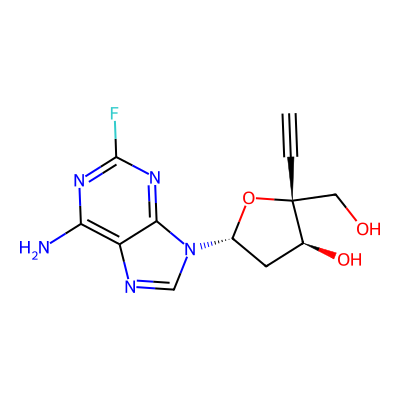


These are the buyable compounds needed for this pathway:
Buyable Compound 1: C#CC(O)(CO)CO


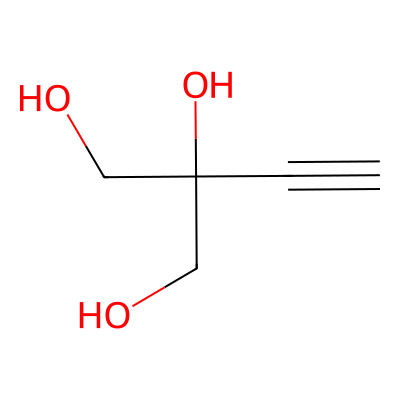

Buyable Compound 2: CC=O


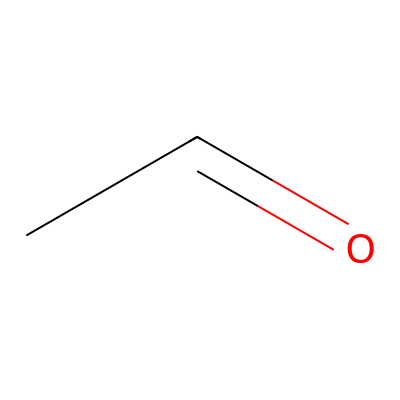

Buyable Compound 3: Nc1nc(F)nc2[nH]cnc12


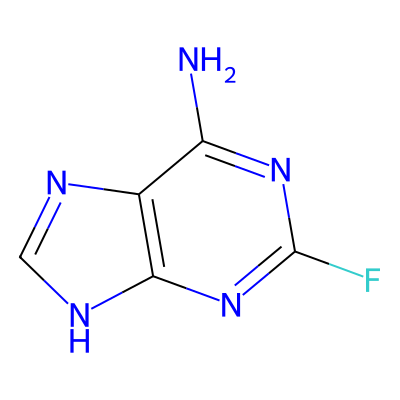


Reaction 1: PNP (Incorporated from RDEnzyme)
Reaction SMILES: C#C[C@]1(CO)O[C@H](OP(=O)([O-])[O-])C[C@@H]1O.Nc1nc(F)nc2[nH]cnc12>>C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


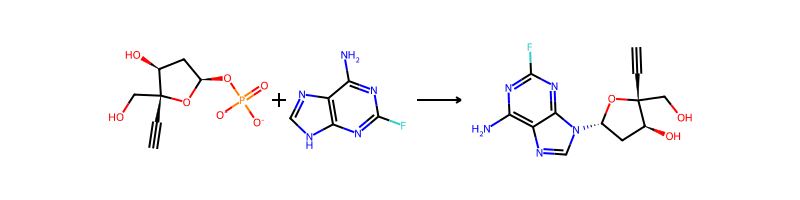

-------------------------------------------------------------------------------------------------------------------------------------------------


Enter a number (1-2) to explore a path or type 'exit' to quit:  2



This is path 2 of 2
--------------------
Target Compound: C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


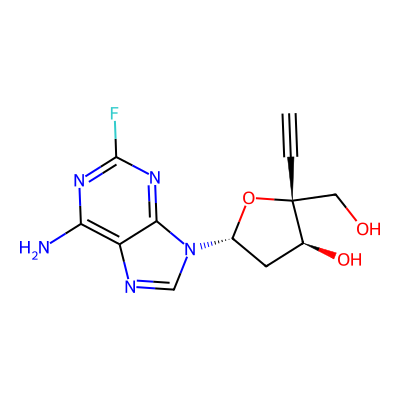


These are the buyable compounds needed for this pathway:
Buyable Compound 1: Nc1nc(F)nc2[nH]cnc12


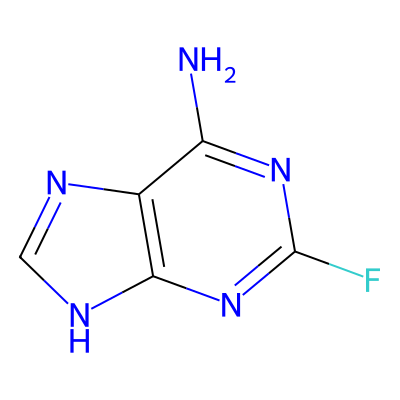


Reaction 1: PNP
Reaction SMILES: Nc1nc(F)nc2[nH]cnc12>>C#C[C@]1(CO)O[C@@H](n2cnc3c(N)nc(F)nc32)C[C@@H]1O


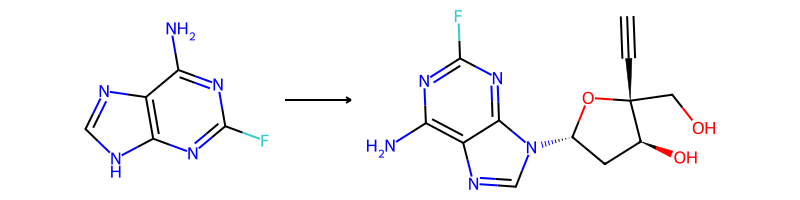

-------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
print("There are " + str(len(paths)) + " paths found.")
while True:
    user_input = input(f"Enter a number (1-{len(paths)}) to explore a path or type 'exit' to quit: ")

    if user_input.lower() == "exit":
        print("Program has been terminated.")
        break

    try:
        num = int(user_input)
        if 1 <= num <= len(paths):
            path_explorer2(paths[num - 1], num, len(paths))
        else:
            print(f"Invalid input. Please enter a number between 1 and {len(paths)}.")
    except ValueError:
        print("Invalid input. Please enter a valid integer or type 'exit' to quit.")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------")